In [1]:
#Importamos las librerías necesarias.
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

sns.set()

In [26]:
#Tomamos el contenido de la página de wikipedia sobre las empresas que componen el SP500 y transformamos a dataframe.
pagina = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_empresas = pd.read_html(pagina.content)[0]
sp500_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
#Vemos que empresas tienen mal sus códigos (hallado a posteriori en celda 5)
aux = []
for i in sp500_empresas['Symbol'].values:
    if i.find('.')!=-1:
        aux.append(i)
aux

['BRK.B', 'BF.B']

In [27]:
#Reemplazamos por el código correcto
sp500_empresas['Symbol'].replace('BRK.B','BRK-B',inplace=True)
sp500_empresas['Symbol'].replace('BF.B','BF-B',inplace=True)

In [6]:
#Obtenemos el valor del market cap de cada empresa. Utilizamos para ello Yahoo Finance.
lista = []

for symbol in sp500_empresas.Symbol.values:
    lista.append(yf.Ticker(symbol).fast_info['marketCap'])

In [28]:
sp500_empresas = pd.read_csv('Empresas_SP500_con_marketcap.csv')
sp500_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,6.023020e+10
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.909733e+09
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.793130e+11
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.710367e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.705861e+11


In [202]:
#Agregamos esta columna l dataframe y comprobamos con lo que está en la web
sp500_empresas['Market Capitalization']=lista
sp500_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,6.023020e+10
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.909733e+09
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.793130e+11
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.710367e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.705861e+11


In [34]:
round(yf.Ticker('MMM').history('1d')['Close'].values[0],2)

107.8

In [41]:
#Buscamos el último valor de la acción de cada empresa.
lista_acciones = []

for symbol in sp500_empresas.Symbol.values:
    try:
        lista_acciones.append(round(yf.Ticker(symbol).history('1d')['Close'].values[0],2))
    except:
        print('Problemas con ',symbol)

In [42]:
#Lo agregamos a la lista
sp500_empresas['Current stock value']=lista_acciones

In [43]:
sp500_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization,Current stock value
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,6.023020e+10,107.80
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.909733e+09,64.90
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.793130e+11,100.46
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.710367e+11,152.71
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.705861e+11,266.53


In [44]:
#Como el proceso de la celda 5 demora mucho vamos a exportar esto a un csv asi no debe repetirse siempre
sp500_empresas.to_csv('Empresas_SP500_con_marketcap.csv',index=False)

El SP500 es un indice que muestra el promedio ponderado por Market Capitalization de las acciones de las 500 empresas de mayor cotización de Wall Street. Su valor de ese día esta dado por la siguiente suma:

###### - SP500 = (market_cap_emp1/market_cap_total)*accion_emp1 + (market_cap_emp2/market_cap_total)*accion_emp2 + (market_cap_emp3/market_cap_total)*accion_emp3 + ... + (market_cap_emp500/market_cap_total)*accion_emp500

In [53]:
#Importamos los valores del indice SP500 de los últimos 23 años
sp500_indice = yf.Ticker('^GSPC')
sp500_df = pd.DataFrame(sp500_indice.history('23y'))
sp500_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-02-23 00:00:00-05:00,1352.170044,1370.109985,1342.439941,1360.689941,993700000,0.0,0.0
2000-02-24 00:00:00-05:00,1360.689941,1364.800049,1329.880005,1353.430054,1215000000,0.0,0.0
2000-02-25 00:00:00-05:00,1353.430054,1362.140015,1329.150024,1333.359985,1065200000,0.0,0.0
2000-02-28 00:00:00-05:00,1333.359985,1360.819946,1325.069946,1348.050049,1026500000,0.0,0.0
2000-02-29 00:00:00-05:00,1348.050049,1369.630005,1348.050049,1366.420044,1204300000,0.0,0.0


In [54]:
#Vemos si hay valores distintos de nulos bajo dividends y stock splits
print(sp500_df['Dividends'].unique())
print(sp500_df['Stock Splits'].unique())

[0.]
[0.]


In [55]:
#Como no hay la dropeamos
sp500_df.drop(columns=['Dividends','Stock Splits'],inplace=True)
sp500_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-02-23 00:00:00-05:00,1352.170044,1370.109985,1342.439941,1360.689941,993700000
2000-02-24 00:00:00-05:00,1360.689941,1364.800049,1329.880005,1353.430054,1215000000
2000-02-25 00:00:00-05:00,1353.430054,1362.140015,1329.150024,1333.359985,1065200000
2000-02-28 00:00:00-05:00,1333.359985,1360.819946,1325.069946,1348.050049,1026500000
2000-02-29 00:00:00-05:00,1348.050049,1369.630005,1348.050049,1366.420044,1204300000


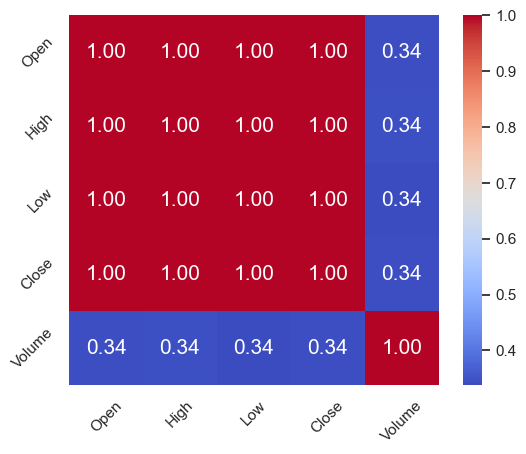

In [56]:
#Analizamos correlación entre las variables.
sns.heatmap(sp500_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= sp500_df.columns, 
           yticklabels= sp500_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Se ve una completa correlación entre los precios de las acciones al abrir, cerrar, picos y valles. Nos vamos a quedar con el precio de cierre. Por otro lado, no se ve una correlación muy grande entre el valor de la acción y el volumen de transacciones.

In [57]:
#Eliminamos las columnas
sp500_df.drop(columns=['Open','High','Low'],inplace=True)
sp500_df.head()

,Close,Volume
Date,,
2000-02-23 00:00:00-05:00,1360.689941,993700000
2000-02-24 00:00:00-05:00,1353.430054,1215000000
2000-02-25 00:00:00-05:00,1333.359985,1065200000
2000-02-28 00:00:00-05:00,1348.050049,1026500000
2000-02-29 00:00:00-05:00,1366.420044,1204300000


In [58]:
#Limpiamos un poco la fecha
sp500_df.index=sp500_df.index.strftime('%Y-%m-%d')
sp500_df.index=pd.to_datetime(sp500_df.index)
sp500_df.head()

,Close,Volume
Date,,
2000-02-23,1360.689941,993700000
2000-02-24,1353.430054,1215000000
2000-02-25,1333.359985,1065200000
2000-02-28,1348.050049,1026500000
2000-02-29,1366.420044,1204300000


In [92]:
#Enviamos la data a un csv
sp500_df.to_csv('sp500.csv')

Para realizar un estudio más detallado debemos buscar la información de cada una de las empresas que componen el SP500. Si bien no se van a analizar todas (ya que vamos a analizar por sector y subsector primero) para ahorrar tiempo vamos a importar los datos de todas las empresas y exportarlas a csv.

En principio haríamos el mismo trabajo de limpieza con los datos de las empresas (eliminación de columnas, etc) que hicimos con el indice del SP500. Para asegurar que no haya problemas seleccionaremos 5 empresas y observaremos la correlación de los features y que las columnas dividendos y stock splits sean 0. Si sucede lo mismo podemos suponer que en todas va a suceder  lo mismo.

In [96]:
#Tomamos 5 empresas al azar y tomamos solo los últimos 5 años para hacerlo mas liviano
empresas_a_chequear = sp500_empresas.sample(n=5,random_state=52)
empresa1 = yf.Ticker(empresas_a_chequear['Symbol'].values[0])
empresa1_df = pd.DataFrame(empresa1.history('5y'))
empresa2 = yf.Ticker(empresas_a_chequear['Symbol'].values[1])
empresa2_df = pd.DataFrame(empresa2.history('5y'))
empresa3 = yf.Ticker(empresas_a_chequear['Symbol'].values[2])
empresa3_df = pd.DataFrame(empresa3.history('5y'))
empresa4 = yf.Ticker(empresas_a_chequear['Symbol'].values[3])
empresa4_df = pd.DataFrame(empresa4.history('5y'))
empresa5 = yf.Ticker(empresas_a_chequear['Symbol'].values[4])
empresa5_df = pd.DataFrame(empresa5.history('5y'))
    

In [98]:
#Vemos la empresa 1
empresa1_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-23 00:00:00-05:00,115.199997,117.080002,114.279999,116.660004,239500,0.0,0.0
2018-02-26 00:00:00-05:00,116.959999,117.930000,116.209999,116.290001,423400,0.0,0.0
2018-02-27 00:00:00-05:00,116.370003,117.360001,114.519997,114.610001,219800,0.0,0.0
2018-02-28 00:00:00-05:00,115.000000,116.540001,113.040001,113.120003,281500,0.0,0.0
2018-03-01 00:00:00-05:00,112.959999,113.970001,111.430000,112.739998,212900,0.0,0.0


In [100]:
print(empresa1_df['Dividends'].unique())
print(empresa1_df['Stock Splits'].unique())

[0.]
[0.]


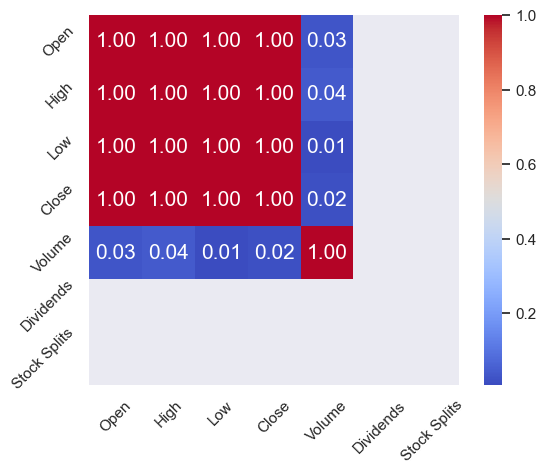

In [101]:
sns.heatmap(empresa1_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= empresa1_df.columns, 
           yticklabels= empresa1_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [102]:
#Vemos la empresa 2
empresa2_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-23 00:00:00-05:00,59.488016,59.722458,58.550238,59.184109,5804800,0.0,0.0
2018-02-26 00:00:00-05:00,59.218852,59.453300,58.671819,59.244907,7837600,0.0,0.0
2018-02-27 00:00:00-05:00,60.173998,60.486591,59.149390,59.262268,7391900,0.0,0.0
2018-02-28 00:00:00-05:00,59.366476,59.644335,58.706557,58.810757,10799800,0.0,0.0
2018-03-01 00:00:00-05:00,58.784689,59.505389,57.968480,58.307121,9556400,0.0,0.0


In [103]:
print(empresa2_df['Dividends'].unique())
print(empresa2_df['Stock Splits'].unique())

[0.    0.5   0.55  0.605]
[0.]


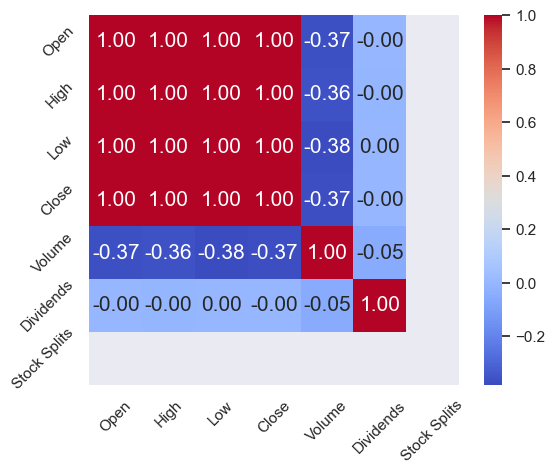

In [104]:
sns.heatmap(empresa2_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= empresa2_df.columns, 
           yticklabels= empresa2_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [105]:
#Vemos la empresa 3
empresa3_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-23 00:00:00-05:00,71.988985,73.078058,71.897460,73.032303,2329600,0.0,0.0
2018-02-26 00:00:00-05:00,73.233649,73.929197,73.132984,73.737007,1790000,0.0,0.0
2018-02-27 00:00:00-05:00,73.764460,74.139692,73.380081,73.380081,2315800,0.0,0.0
2018-02-28 00:00:00-05:00,73.855971,75.677208,73.782761,74.478302,3629400,0.0,0.0
2018-03-01 00:00:00-05:00,74.112247,74.789488,72.519808,72.940796,2674000,0.0,0.0


In [106]:
print(empresa3_df['Dividends'].unique())
print(empresa3_df['Stock Splits'].unique())

[0.    0.36  0.42  0.47  0.5   0.57  0.605]
[0.]


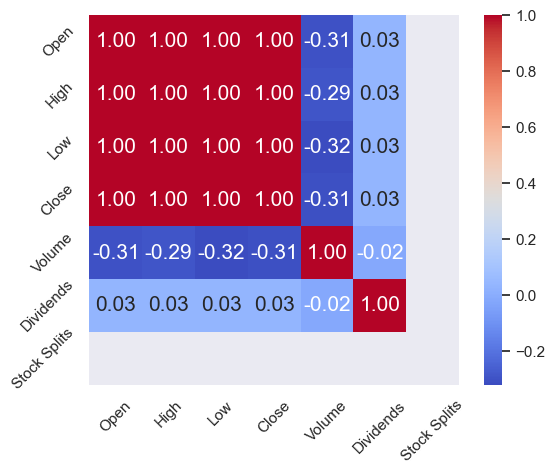

In [107]:
sns.heatmap(empresa3_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= empresa3_df.columns, 
           yticklabels= empresa3_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [108]:
#Vemos la empresa 4
empresa4_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-23 00:00:00-05:00,87.152808,87.790664,86.577839,87.098900,1252500,0.0,0.0
2018-02-26 00:00:00-05:00,87.215696,88.491408,87.098901,88.042213,881200,0.0,0.0
2018-02-27 00:00:00-05:00,88.167984,89.344872,87.853549,88.212906,1492900,0.0,0.0
2018-02-28 00:00:00-05:00,88.698016,89.102289,88.185934,88.275772,1309100,0.0,0.0
2018-03-01 00:00:00-05:00,88.221876,89.039414,87.179748,87.862526,1219600,0.0,0.0


In [109]:
print(empresa4_df['Dividends'].unique())
print(empresa4_df['Stock Splits'].unique())

[0.    0.656 0.722 0.773 0.804 0.901 1.036]
[0.]


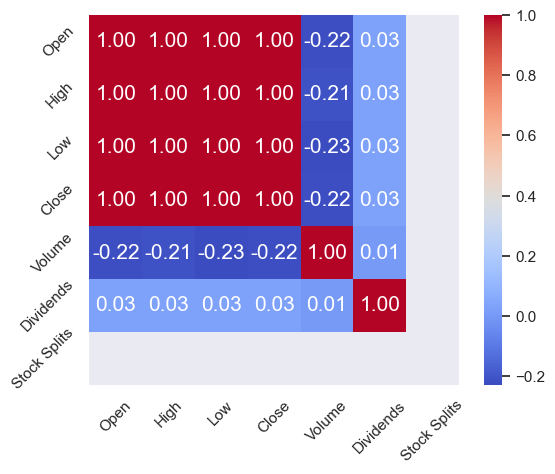

In [110]:
sns.heatmap(empresa4_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= empresa4_df.columns, 
           yticklabels= empresa4_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [111]:
#Vemos la empresa 5
empresa5_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-23 00:00:00-05:00,11.95,12.16,11.94,12.07,33317600,0.0,0.0
2018-02-26 00:00:00-05:00,12.14,12.43,12.05,12.42,42265200,0.0,0.0
2018-02-27 00:00:00-05:00,12.43,12.88,12.39,12.53,55975300,0.0,0.0
2018-02-28 00:00:00-05:00,12.66,12.73,12.10,12.11,43387500,0.0,0.0
2018-03-01 00:00:00-05:00,12.26,12.27,11.66,11.90,63207400,0.0,0.0


In [112]:
print(empresa5_df['Dividends'].unique())
print(empresa5_df['Stock Splits'].unique())

[0.]
[0.]


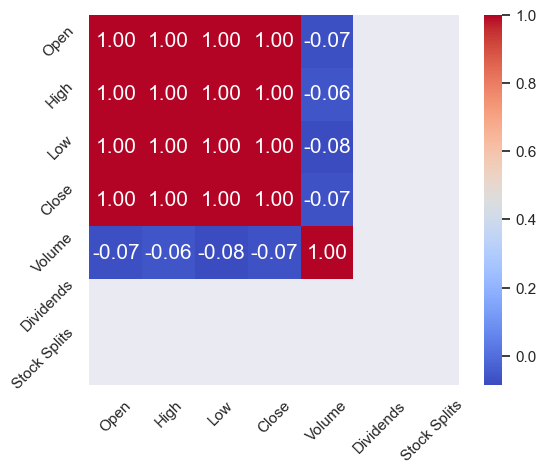

In [113]:
sns.heatmap(empresa5_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= empresa5_df.columns, 
           yticklabels= empresa5_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Vemos que en algunos casos se encuentran distintos valores de Dividends. Vamos a dejar esta columna pero si vamos a descartar las otras puesto que se encuentran completamente correlacionadas o son unicamente 0. Dejamos únicamente, entonces, Close, Volume y Dividends. 

In [126]:
#Importamos los datos de todas las empresas.
for symbol in sp500_empresas['Symbol'].values:
    empresa = yf.Ticker(symbol)
    empresa_df = pd.DataFrame(empresa.history('23y'))                               #Importamos los datos y pasamos a DataFrame
    empresa_df.index=empresa_df.index.strftime('%Y-%m-%d')                          #Cambiamos el formato fecha
    empresa_df.drop(columns=['Open','High','Low','Stock Splits'],inplace=True)      #Dropeamos las columnas que dijimos.
    empresa_df.to_csv('C:/Users/larra/Documents/PI02/Empresas/'+str(symbol)+'.csv') #Exportamos a csv

Para finalizar vamos a importar los datos de cada sector del indice SP500. De esta manera podremos comparar los distintos sectores para decidir con cual quedarnos.

In [23]:
indus = yf.Ticker('^SP500-20')
indus_df = pd.DataFrame(indus.history(start='2000-02-23',end='2023-02-23'))
indus_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-02-23 00:00:00-05:00,237.789993,237.789993,237.789993,237.789993,0,0.0,0.0
2000-02-24 00:00:00-05:00,236.899994,236.899994,236.899994,236.899994,0,0.0,0.0
2000-02-25 00:00:00-05:00,232.509995,232.509995,232.509995,232.509995,0,0.0,0.0
2000-02-28 00:00:00-05:00,234.860001,234.860001,234.860001,234.860001,0,0.0,0.0
2000-02-29 00:00:00-05:00,237.500000,237.500000,237.500000,237.500000,0,0.0,0.0


In [25]:
#No encontramos los datos del sector de energía así que ese no va a estar presente. Tomamos los datos de los otros y los guardamos.
industrias = {'Materials':15,'Industrials':20,'Consumer Discretionary':25,'Consumer Staples':30,'Health Care':35,
              'Financials':40,'Information Technology':45,'Communication Services':50,'Utilities':55,'Real Estate':60}
for ind in industrias.keys():
    indus = yf.Ticker('^SP500-'+str(industrias[ind]))
    indus_df = pd.DataFrame(indus.history(start='2000-02-23',end='2023-02-23'))
    indus_df.index=indus_df.index.strftime('%Y-%m-%d')
    indus_df.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)    #Dejamos unicamente los valores
    indus_df.to_csv('C:/Users/larra/Documents/PI02/Sectores/'+str(ind)+'.csv')              #de Close y Volume